In [77]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [78]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [79]:
df.shape


(47587, 16)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [81]:
df.isna().any().sum()

1

In [82]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [83]:
df['Zona'].unique()

array(['Zona Oeste', 'Centro', 'Zona Sul', 'Zona Leste', 'Zona Norte'],
      dtype=object)

In [84]:
databkl = df.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(databkl)

max    min       mean         std  size
Zona     Bairro                                                       
Centro   Aclimação          158.33   0.77  47.479755   17.791085   695
         Barra Funda        114.29  17.59  65.134756   20.124725    82
         Bela Vista        9629.63   0.85  59.570693  151.320872  4096
         Bom Retiro         146.67  11.11  44.007139   19.003003   360
         Cambuci            215.15  14.56  37.317884   16.863213   293
...                            ...    ...        ...         ...   ...
Zona Sul Vila Vera           31.05  17.50  24.677000    5.316526    10
         Vila Vermelha       29.00  29.00  29.000000         NaN     1
         Vila da Saúde       90.32  17.57  52.729683   14.275755   126
         Vila do Encontro   100.00   7.78  27.502338    7.777697   278
         Vila Água Funda     53.33   8.80  25.041852   10.433130    27

[191 rows x 5 columns]

In [85]:
bkl = df[df['Bairro'] == 'Brooklin']
bkl

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
46,308,2480567284,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,250,560,3200,45,1,0,1,1,71.11
66,409,2471516590,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,130,580,3000,41,1,1,1,1,73.17
78,478,2477801995,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,107,791,3450,44,1,1,1,1,78.41
82,496,2480382869,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,91,600,3900,44,1,1,1,1,88.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47455,226707,2500352584,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,200,872,3730,48,1,0,1,1,77.71
47490,226853,2500421812,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,592,3300,51,1,1,1,1,64.71
47536,227114,2500560090,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,545,3200,51,1,1,1,2,62.75
47538,227117,2500560603,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,350,650,3000,51,1,1,1,1,58.82


In [86]:
bkl['Area_Privativa'].describe()

count    2563.000000
mean       73.399532
std       121.605024
min        11.000000
25%        40.000000
50%        46.000000
75%        54.000000
max      1562.000000
Name: Area_Privativa, dtype: float64

In [87]:
bkl['Aluguel_m2'].describe()

count     2563.000000
mean        80.624475
std        322.415477
min          4.260000
25%         58.820000
50%         71.110000
75%         83.315000
max      16190.480000
Name: Aluguel_m2, dtype: float64

In [ ]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [88]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [89]:
limites(bkl['Area_Privativa'])

(19.0, 75.0)

In [90]:
limites(bkl['Aluguel_m2'])

(22.077500000000008, 120.05749999999999)

In [91]:
# Coletando a mediana e o Q3 da tabela df

medianabk = np.percentile(bkl.Aluguel_m2, 50)
q3bk = np.percentile(bkl.Aluguel_m2, 75)
print(medianabk)
print(q3bk)

71.11
83.315


In [92]:
bkl_ = bkl[(bkl.Aluguel_m2 >= medianabk) & (bkl.Aluguel_m2 <= q3bk)]
print(bkl_)

       Unnamed: 0   Id_Oferta       Portal    Bairro        Zona     Cidade  \
46            308  2480567284  Zap Imóveis  Brooklin  Zona Oeste  São Paulo   
66            409  2471516590  Zap Imóveis  Brooklin  Zona Oeste  São Paulo   
78            478  2477801995  Zap Imóveis  Brooklin  Zona Oeste  São Paulo   
139           732  2472884839  Zap Imóveis  Brooklin  Zona Oeste  São Paulo   
326          1827  2470136178  Zap Imóveis  Brooklin  Zona Oeste  São Paulo   
...           ...         ...          ...       ...         ...        ...   
46986      224541  2499770087  Zap Imóveis  Brooklin    Zona Sul  São Paulo   
47305      226018  2500232025  Zap Imóveis  Brooklin    Zona Sul  São Paulo   
47306      226020  2500232027  Zap Imóveis  Brooklin    Zona Sul  São Paulo   
47333      226097  2500234499  Zap Imóveis  Brooklin    Zona Sul  São Paulo   
47455      226707  2500352584  Zap Imóveis  Brooklin    Zona Sul  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor

In [93]:
# Transformando num dataframe legível

dfbkl = pd.DataFrame(data=bkl_)
display(dfbkl)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
46,308,2480567284,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,250,560,3200,45,1,0,1,1,71.11
66,409,2471516590,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,130,580,3000,41,1,1,1,1,73.17
78,478,2477801995,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,107,791,3450,44,1,1,1,1,78.41
139,732,2472884839,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,100,600,3000,37,1,0,1,1,81.08
326,1827,2470136178,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,171,900,4000,51,1,1,1,2,78.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46986,224541,2499770087,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,0,80,2000,25,1,0,1,1,80.00
47305,226018,2500232025,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,50,495,3500,49,1,1,1,1,71.43
47306,226020,2500232027,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,166,572,3730,51,1,0,1,1,73.14
47333,226097,2500234499,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,140,850,3700,50,1,0,1,1,74.00


In [94]:
dfbkl['Area_Privativa'].describe()

count    655.000000
mean      60.505344
std       73.352983
min       18.000000
25%       41.000000
50%       45.000000
75%       51.000000
max      579.000000
Name: Area_Privativa, dtype: float64

In [95]:
dfbkl['Area_Privativa'].value_counts()

45     98
44     54
49     40
52     34
51     34
       ..
58      1
28      1
27      1
25      1
579     1
Name: Area_Privativa, Length: 69, dtype: int64

In [96]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

limites(dfbkl['Area_Privativa'])

(26.0, 66.0)

In [97]:
medianaap = np.percentile(dfbkl.Area_Privativa, 50)
q3ap = np.percentile(dfbkl.Area_Privativa, 75)
print(medianaap)
print(q3ap)

45.0
51.0


In [98]:
dfbkl = dfbkl[dfbkl.Area_Privativa <= 66.0]
dfbkl

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
46,308,2480567284,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,250,560,3200,45,1,0,1,1,71.11
66,409,2471516590,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,130,580,3000,41,1,1,1,1,73.17
78,478,2477801995,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,107,791,3450,44,1,1,1,1,78.41
139,732,2472884839,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,100,600,3000,37,1,0,1,1,81.08
326,1827,2470136178,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,171,900,4000,51,1,1,1,2,78.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46986,224541,2499770087,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,0,80,2000,25,1,0,1,1,80.00
47305,226018,2500232025,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,50,495,3500,49,1,1,1,1,71.43
47306,226020,2500232027,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,166,572,3730,51,1,0,1,1,73.14
47333,226097,2500234499,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,140,850,3700,50,1,0,1,1,74.00


In [99]:
#df_bkl = df_st[df_st['Bairro'] == 'Brooklin']
#df_bkl

In [100]:
# Agrupando as métricas básicas dos Bairros da zona sul

#databkl1 = df_bkl.groupby(['Bairro', 'Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
#display(databkl1)

In [101]:
databkl2 = dfbkl.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
databkl2.replace(np.nan, 0, inplace=True)
display(databkl2)

,min,max,mean,std,size
Area_Privativa,,,,,
18,80.56,80.56,80.560000,0.000000,1
23,74.35,75.22,74.785000,0.615183,2
25,80.00,80.00,80.000000,0.000000,1
26,82.69,82.69,82.690000,0.000000,2
27,80.74,80.74,80.740000,0.000000,1
28,71.43,71.43,71.430000,0.000000,1
29,72.41,79.31,76.895714,2.589195,7
30,71.67,80.00,73.762857,3.245503,7
31,79.03,81.61,79.870000,1.199250,5


In [110]:
databkl_ = dfbkl.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
databkl_.replace(np.nan, 0, inplace=True)
display(databkl_)

,min,max,mean,std,size
Area_Privativa,,,,,
18,1450,1450,1450.000000,0.000000,1
23,1710,1730,1720.000000,14.142136,2
25,2000,2000,2000.000000,0.000000,1
26,2150,2150,2150.000000,0.000000,2
27,2180,2180,2180.000000,0.000000,1
28,2000,2000,2000.000000,0.000000,1
29,2100,2300,2230.000000,75.055535,7
30,2150,2400,2212.857143,97.419075,7
31,2450,2530,2476.000000,37.148351,5


In [104]:
databkl = dfbkl.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)
databkl

,media
Area_Privativa,
18,80.6
23,74.8
25,80.0
26,82.7
27,80.7
28,71.4
29,76.9
30,73.8
31,79.9


In [111]:
#df_bkl['Aluguel_m2'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

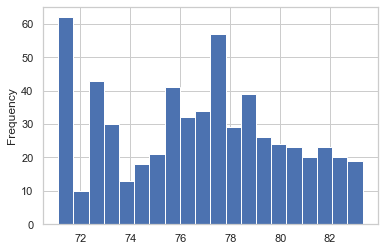

In [106]:
dfbkl['Aluguel_m2'].plot.hist(bins=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '18'),
  Text(1, 0, '23'),
  Text(2, 0, '25'),
  Text(3, 0, '26'),
  Text(4, 0, '27'),
  Text(5, 0, '28'),
  Text(6, 0, '29'),
  Text(7, 0, '30'),
  Text(8, 0, '31'),
  Text(9, 0, '32'),
  Text(10, 0, '33'),
  Text(11, 0, '34'),
  Text(12, 0, '35'),
  Text(13, 0, '36'),
  Text(14, 0, '37'),
  Text(15, 0, '38'),
  Text(16, 0, '39'),
  Text(17, 0, '40'),
  Text(18, 0, '41'),
  Text(19, 0, '42'),
  Text(20, 0, '43'),
  Text(21, 0, '44'),
  Text(22, 0, '45'),
  Text(23, 0, '46'),
  Text(24, 0, '47'),
  Text(25, 0, '48'),
  Text(26, 0, '49'),
  Text(27, 0, '50'),
  Text(28, 0, '51'),
  Text(29, 0, '52'),
  Text(30, 0, '53'),
  Text(31, 0, '54'),
  Text(32, 0, '55'),
  Text(33, 0, '58'),
  Text(34, 0, '59'),
  Text(35, 0, '61'),
  Text(36, 0, '62'),
  Text(37, 0, '63'),
  Text(38, 0, '64'),
 

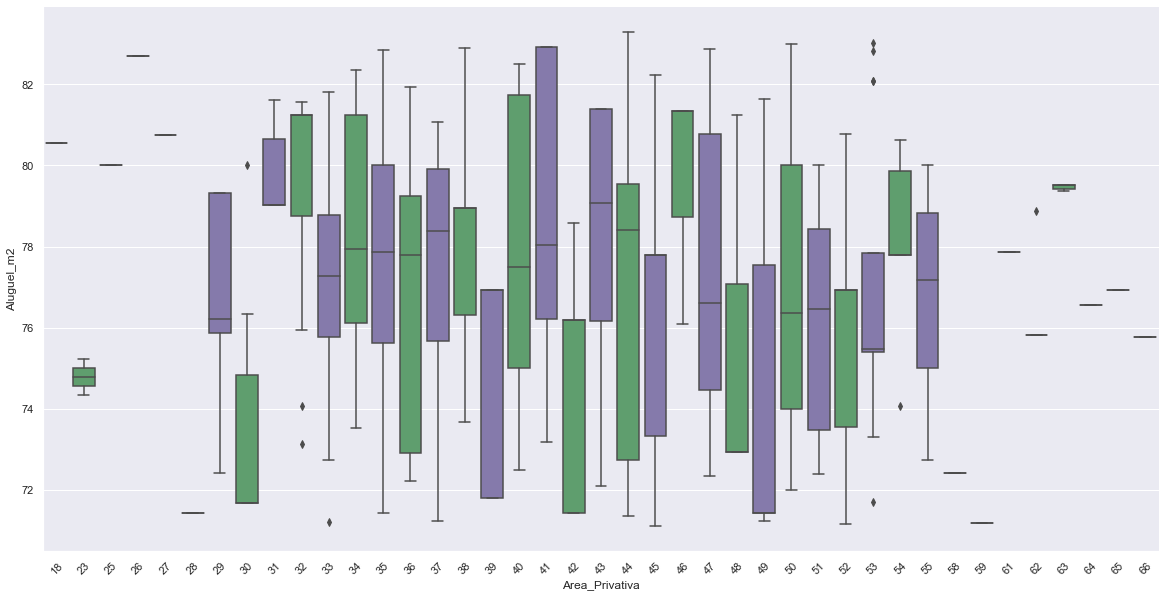

In [112]:
sns.set()
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Area_Privativa", y="Aluguel_m2", palette=["m", "g"],
            data=dfbkl)
sns.despine()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '18'),
  Text(1, 0, '23'),
  Text(2, 0, '25'),
  Text(3, 0, '26'),
  Text(4, 0, '27'),
  Text(5, 0, '28'),
  Text(6, 0, '29'),
  Text(7, 0, '30'),
  Text(8, 0, '31'),
  Text(9, 0, '32'),
  Text(10, 0, '33'),
  Text(11, 0, '34'),
  Text(12, 0, '35'),
  Text(13, 0, '36'),
  Text(14, 0, '37'),
  Text(15, 0, '38'),
  Text(16, 0, '39'),
  Text(17, 0, '40'),
  Text(18, 0, '41'),
  Text(19, 0, '42'),
  Text(20, 0, '43'),
  Text(21, 0, '44'),
  Text(22, 0, '45'),
  Text(23, 0, '46'),
  Text(24, 0, '47'),
  Text(25, 0, '48'),
  Text(26, 0, '49'),
  Text(27, 0, '50'),
  Text(28, 0, '51'),
  Text(29, 0, '52'),
  Text(30, 0, '53'),
  Text(31, 0, '54'),
  Text(32, 0, '55'),
  Text(33, 0, '58'),
  Text(34, 0, '59'),
  Text(35, 0, '61'),
  Text(36, 0, '62'),
  Text(37, 0, '63'),
  Text(38, 0, '64'),
 

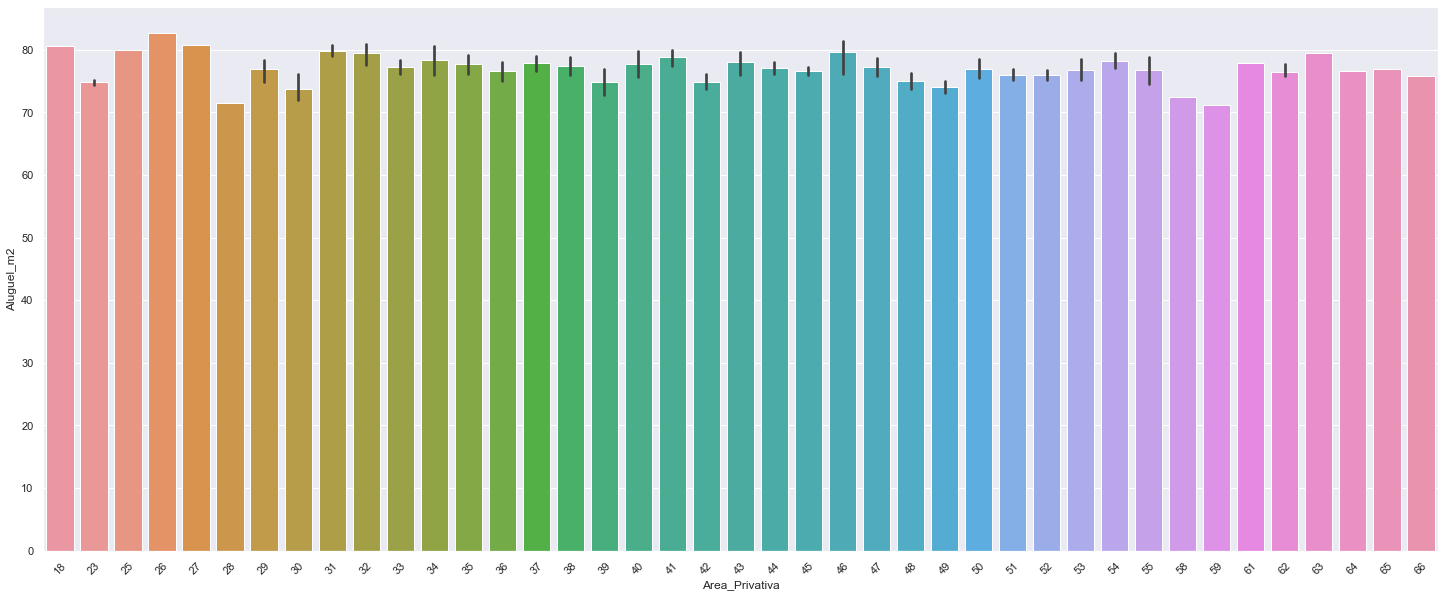

In [113]:
plt.figure(figsize=(25,10))
sns.barplot(x = dfbkl['Area_Privativa'], y = dfbkl['Aluguel_m2'])
plt.xticks(rotation=45)

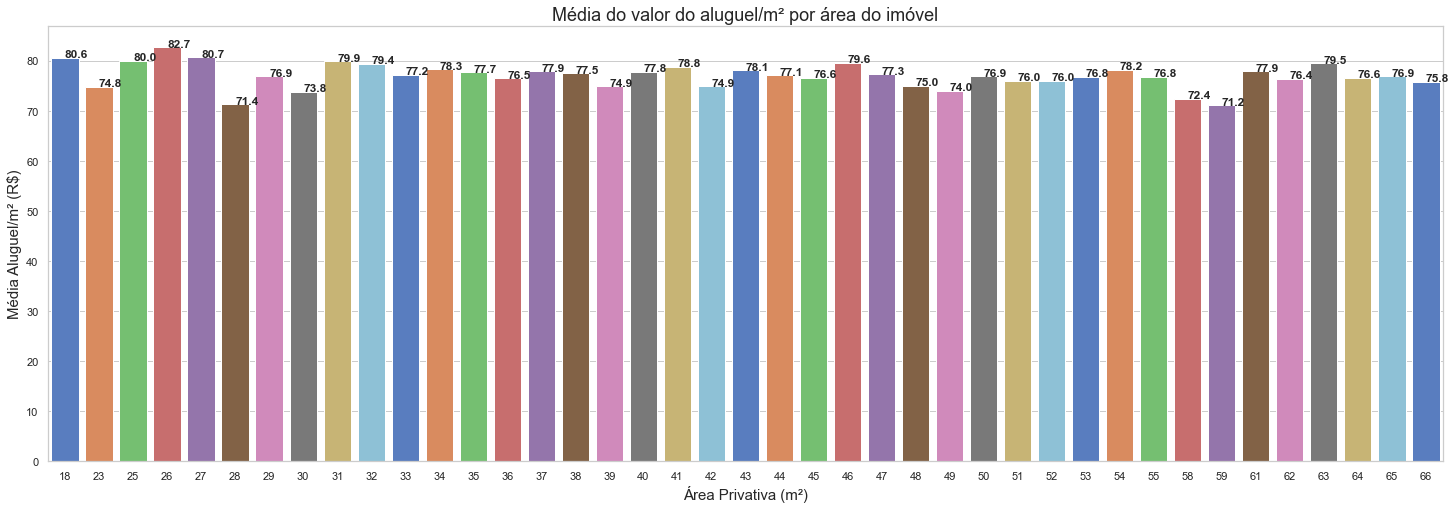

In [114]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(25,8))
ax = sns.barplot(x=databkl.index, y='media', data=databkl, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )


In [116]:
databkl_ = dfbkl.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)
databkl_

,media
Area_Privativa,
18,1450.0
23,1720.0
25,2000.0
26,2150.0
27,2180.0
28,2000.0
29,2230.0
30,2212.9
31,2476.0


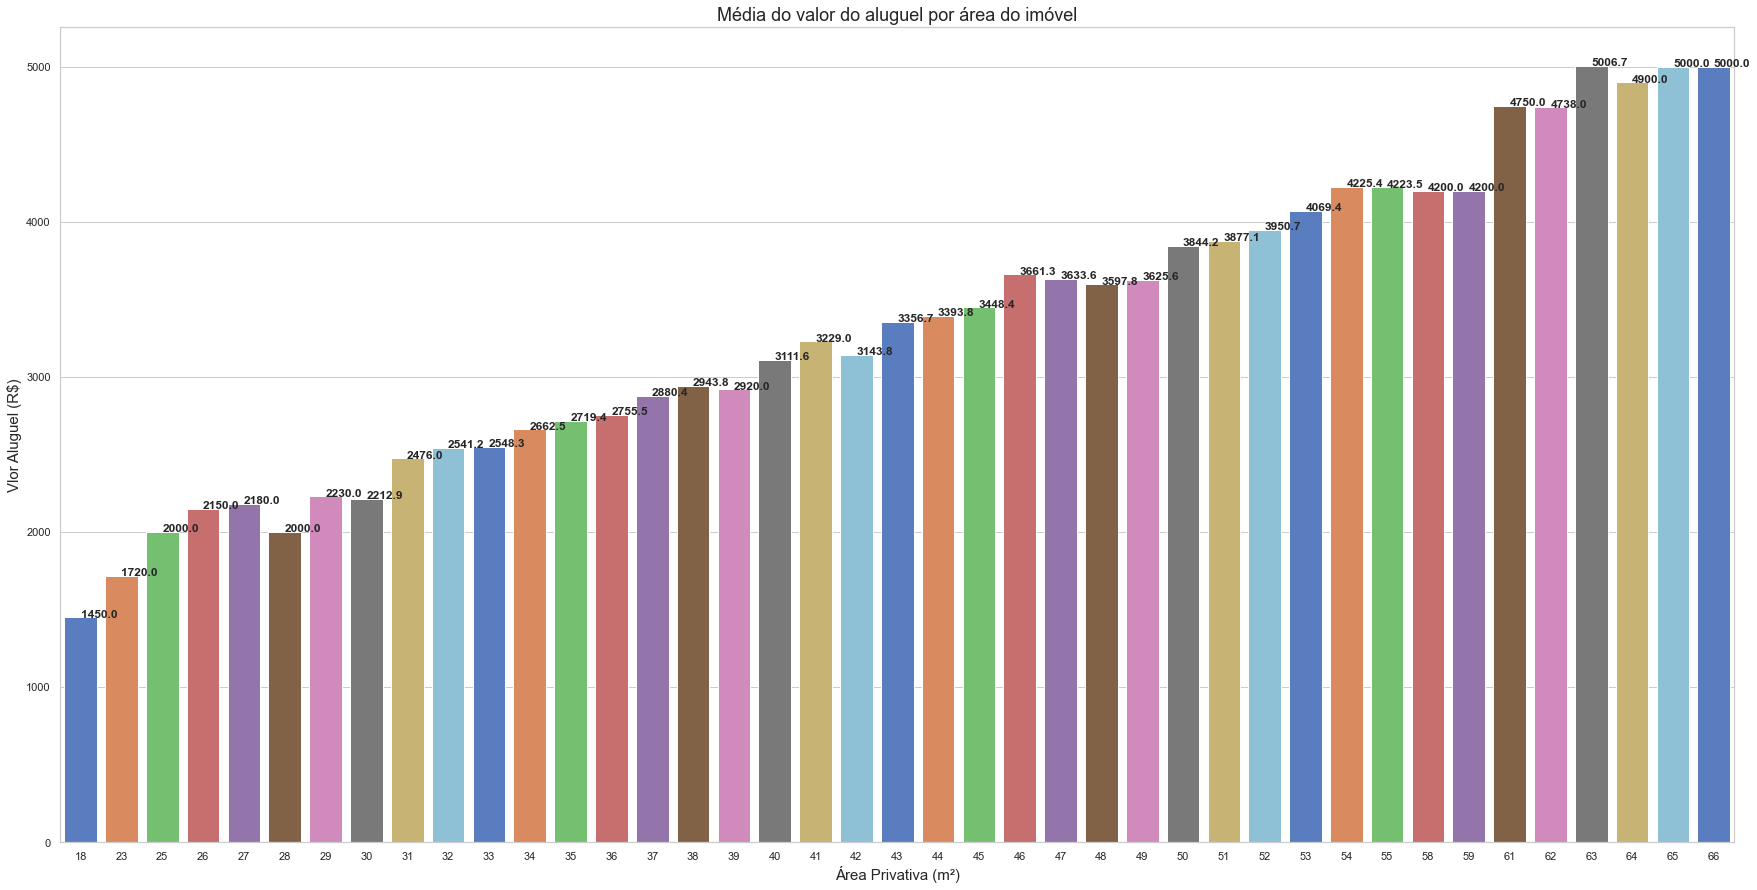

In [118]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=databkl_.index, y='media', data=databkl_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )


In [ ]:
Valor_Iptu	Valor_Condominio	Valor_Aluguel	Area_Privativa	Dormitorios	Suites	Vagas	Banheiros	Aluguel_m2

In [131]:
def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

C:\Users\GabrielMedina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GabrielMedina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GabrielMedina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<Figure size 1440x720 with 0 Axes>

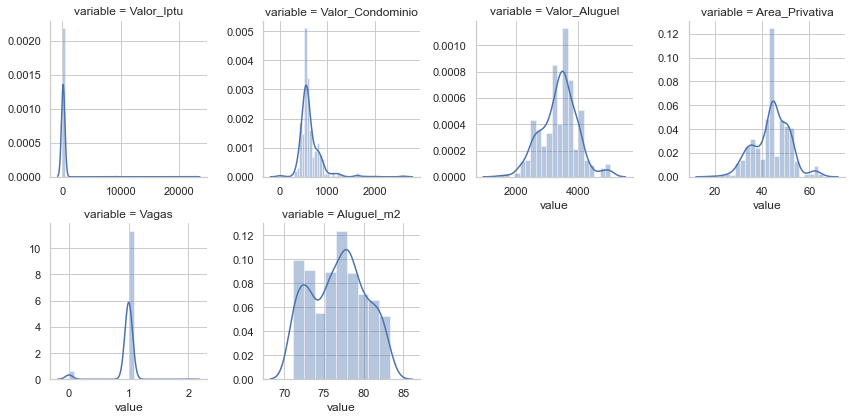

In [132]:
plt.figure(figsize=(20,10))
hist_col_num(dfbkl, dfbkl[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])